In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/Vikash/Desktop/heru/dataset1-master/empl.csv')
df

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [4]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
list1=['City','Country']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [5]:
df

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,8,3,20000.0
1,2,Lee,31.0,3,3,3900.0
2,3,Dave,34.0,8,3,8000.0
3,4,Anik,26.0,5,2,66672.0
4,5,kamal,30.0,9,1,NaN
5,6,Geet,NaN,5,2,30007.0
6,7,Steven,43.0,1,1,8300.0
7,8,Ram,38.0,6,2,54666.0
8,9,hari,50.0,10,1,67666.0
9,11,yami,NaN,10,1,8888.0


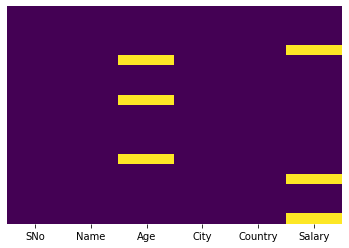

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop('Name',axis=1,inplace=True)

In [11]:
df

,SNo,Age,City,Country,Salary
0,1,28.0,8,3,20000.0
1,2,31.0,3,3,3900.0
2,3,34.0,8,3,8000.0
3,4,26.0,5,2,66672.0
4,5,30.0,9,1,NaN
5,6,NaN,5,2,30007.0
6,7,43.0,1,1,8300.0
7,8,38.0,6,2,54666.0
8,9,50.0,10,1,67666.0
9,11,NaN,10,1,8888.0


In [12]:
df.dropna(inplace=True)

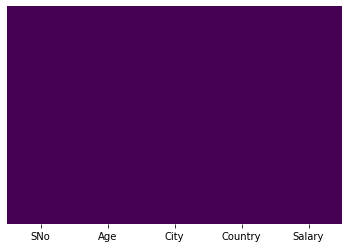

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
df.columns

Index(['SNo', 'Age', 'City', 'Country', 'Salary'], dtype='object')

In [18]:
x = df[['Age', 'City', 'Country']]
y = df['Salary']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [29]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(lm.intercept_)

26740.117758031192


In [32]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Age,-100.954974
City,4166.453871
Country,-3512.124621


In [34]:
predictions = lm.predict(x_test)

In [35]:
lm.score(x_train,y_train)

0.38295223966442127

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 30214.73361630204
MSE: 1191479453.4248896
RMSE: 34517.81356669176
